# An Examination of School Improvement Grants 2010

## Questions to answer:
============================================

1. What is the total amount of funding? 

2. How much of the total funding is allocated to each type of model chosen by the schools?  

3. How much money allocated to each State, are certain States allocated more money than others?

4. What types of models of reform did schools choose in each state, what are the most prevelant types of models chosen in each state?

5. How much money is allocated to each state based upon the models chosen?

6. Which Districts have the most amount of money allocated to them? 

7. What is the amount of funding allocated to each school within the districts and what type of model they have chosen?


### PDF of Report:

The write up of this analysis can be found here in PDF form:

https://drive.google.com/file/d/11yDqx-TEclHw-XDOTS80_kuta8KK74nk/view?usp=sharing


The complete writeup found in the pdf link can also be found at the end of this notebook under the section 7.

# Code:

## 1. Importing and setting up notebook for project:

In [1]:
from urllib.request import urlretrieve
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import plotly 
# requires version >= 1.9.0
init_notebook_mode(connected=True) # run at the start of every notebook

#importing all necessary modules

In [2]:
!cd ~/Documents/Data_Science/DataSets
#Changing my directory to download csv

In [3]:
url= 'https://inventory.data.gov/dataset/ce23c458-9c25-4bcc-a7bd-0490641dec8e/resource/9665a448-6f2f-4872-99b9-bf12b5af84f4/download/userssharedsdfschoolimprovement2010grants.csv'
#Passing the the url to the url variable for retrieval
_=urlretrieve(url,'Schools.csv')
#Using the url retrieval tool to pull the file off the web and create a csv named Schools.csv

## 2. Exploring the structure of the data for analysis

In [4]:
schooldfs= pd.read_csv('Schools.csv')
#Reading the csv file fro the directory i placed it in.
print('The columns for school dataframe')
print(schooldfs.columns)
#Looking at the columns for the DataFrame
print('\nThe data structure for the school dataframe')
print(schooldfs.info())
#Examining the information for each of the columns.

The columns for school dataframe
Index(['School Name', 'City', 'State', 'District Name', '2010/11/Award Amount',
       'Model Selected', 'Location'],
      dtype='object')

The data structure for the school dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 7 columns):
School Name             831 non-null object
City                    831 non-null object
State                   831 non-null object
District Name           831 non-null object
2010/11/Award Amount    757 non-null object
Model Selected          825 non-null object
Location                831 non-null object
dtypes: object(7)
memory usage: 45.5+ KB
None


===============================================================


I see that we have some missing values in columns above. I will have to examine the metadata at https://catalog.data.gov/dataset/school-improvement-2010-grants.

===============================================================

## 3. Cleaning the Data

In [5]:
schooldfs['2010/11/Award Amount']=schooldfs['2010/11/Award Amount'].str.replace('$', ' ').astype('float')
# Reformatting the Award column because I want to perform analysis using this column. So therefore it needs be cast from an object type('string') to a float.
schooldfs.columns=['School Name', 'City', 'State', 'District Name', 'Award Amount', 'Model Selected','Location']
# I wanted to rename the award amount column to something a little more readable


null=schooldfs[schooldfs['Award Amount'].isnull()]
#Checking the Dataframe for null values.

print('========================================\nLayout of the Dataframe before deleting the null values:\n')
print(schooldfs.info())
print('========================================\nSummary Statistics before deleting the null values:\n')
print(schooldfs['Award Amount'].describe())
print('========================================\nNumber of States before deleting the null values:\n')
print(schooldfs.State.nunique())
print('========================================')

schooldfs.dropna(subset=['Award Amount'],inplace=True)

print('Number of States After deleting the null values:\n')
print(schooldfs.State.nunique())
print('========================================\nThe layout of the Dataframe after the deletion of the null values:\n')
print(schooldfs.info())
print('\n=================================\nSummary statistics for the dataframe after deleting the null values:\n')
print(schooldfs['Award Amount'].describe())

Layout of the Dataframe before deleting the null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 7 columns):
School Name       831 non-null object
City              831 non-null object
State             831 non-null object
District Name     831 non-null object
Award Amount      757 non-null float64
Model Selected    825 non-null object
Location          831 non-null object
dtypes: float64(1), object(6)
memory usage: 45.5+ KB
None
Summary Statistics before deleting the null values:

count       757.000000
mean     420827.894320
std      287458.053183
min           1.000000
25%      162541.000000
50%      407794.000000
75%      671142.000000
max      997852.000000
Name: Award Amount, dtype: float64
Number of States before deleting the null values:

50
Number of States After deleting the null values:

46
The layout of the Dataframe after the deletion of the null values:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 t

===================

It looks like entire states have missing records. For the purpose of this analysis in the time being, I will leave the states that have the null values in the null table. I will leave them removed from the dataset with the proper values- schooldfs. The descriptive statistics haven't changed. For future reference, it might be worth contacting the creator of this data set to see if you could retrive the missing records for the states.

===================

## 4. Testing For Normality

I am going to test the normality of the Award Amount Data. This is a pertinent issue because if the distribution is abnormal and there is a large collection of outliers, then descriptive statistics like mean will have to be used with caution as it will skew the output statistic much the distribution is skewed.

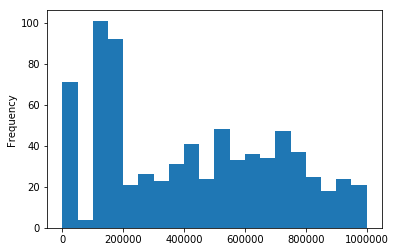


250314.10568031704
258286.89431968296
The differences between the 75th quartile-mean, and the mean-25th quartile are roughly the same.

Statistics=0.941, p=0.000
reject H0,
Data is likely not normally distributed


In [6]:
_=schooldfs['Award Amount'].plot.hist(bins=20)
plt.show()
print('\n===========================================')

quartile75=671142
mean=schooldfs['Award Amount'].mean()
quartile25=162541

difference75_mean=quartile75-mean
print(difference75_mean)
differencemean_25=mean-quartile25
print(differencemean_25)

print('The differences between the 75th quartile-mean, and the mean-25th quartile are roughly the same.\n===========================================\n')


npAward=np.array(schooldfs['Award Amount'])
#Converting the Award series to a numpy array and storing it in it's own variable. 
#Setting the alpha level and runnning the test.
alpha=0.05
stat,p=shapiro(npAward)
print('Statistics=%.3f, p=%.3f' %(stat, p))
#Setting up the interpretation of the test.
if p > alpha:
    print('fail to reject null hypothesis\nData is normally distributed')
else:
    print('reject H0,\nData is likely not normally distributed')

===========================================

After examining all three tells of the normality test, it is safe to assume that the data found within the Award column is not normally distributed.Caution to the use of the statistic mean. The data is skewed to the left, meaning that the use of average is more representative to the lower values of the distribution. Were the distribution normally distributed, I would place more weight to the use of average. Because of failure of normal distribution, for the purpose of this project, I will only use the Sum to make comparisons and report on them. 

===========================================

## 5.  Grouping the Data and creating dataframes for plotting

#### Grouping by District

In [7]:
schooldfs['Nat_Award_Sum']=schooldfs['Award Amount'].sum()
# Creating a column that contains the sum so it can be used for comparison later

bydistrict= schooldfs.groupby(['State','District Name'])
# As the first step in analysis, I am grouping the dataset by State and district to calculate the sum of award allocation for each district per state

distsum=bydistrict['Award Amount'].agg('sum')
#aggregating the groupby by sum for analysis

DistSum= pd.DataFrame(distsum)# Creating a dataframe so I can utilize later and merge if need be
DistSum.columns=['District_Sum']

#### Grouping by State

In [8]:
bystate=schooldfs.loc[:,['State','Award Amount','Nat_Award_Sum',]]
# Accessing the columns of interest for my new dataframe.

statesum=bystate.groupby('State')['Award Amount'].agg('sum')
# grouping by state and aggregating by sum for analysis.

#Creating a dataframe so i can manipulate column info and then merge with schooldfs and create a new DF for analysis 
StateSum=pd.DataFrame(statesum)

StateSum.columns=['State_Sum']
#renaming column to a more desciptive column head
StateSum=StateSum.reset_index()
# Resetting index to merge back into the combined school dataframe.

#Merging the two state dataframes back into the original and creating a new DF
School=pd.merge(StateSum, schooldfs, left_on='State',right_on='State')

### Examining the type of Model selection by state, and the sum of money per model.



##### Sum Per Model



In [9]:

ModelSum=School.loc[:,['Model Selected','Award Amount']]
#Accessing the columns of interest

ModelSum=ModelSum.groupby('Model Selected')['Award Amount'].agg('sum')
#grouping by the model type and aggregating by the sum of the award amount
ModelSum=pd.DataFrame(ModelSum)
#Creating a DataFrame of the grouping
ModelSum.columns=['Nat_Model_Sum']
#renaming the columns to a more descriptive header
ModelSum=ModelSum.reset_index()
#resetting the index so I can Merge dataFrames
School=pd.merge(School,ModelSum,left_on='Model Selected',right_on='Model Selected')
#Merging with School Dataframe so I can plot results in later sections

#Printing the unique values for the new created from the previous merge.
print(School.Nat_Model_Sum.unique())

[2.35725022e+08 1.66126100e+07 6.50265960e+07 1.20248800e+06]


### State:

Now I will examine individual states and calculate the percent difference for the average funds granted to schools based on the type of model selected per state from the national average amount of funds granted to schools across all states. Where do the differences lie between states? This might be a good informative piece to see where the funds of the budget per model are allocated to per state. Will be good to cross reference with the count of models per state and see if there is an explanation as to why there are unusually high amounts of funds allocated per individual states.

In [10]:

StateModel=School[['State','Model Selected','Award Amount','Nat_Model_Sum']]
# Selecting the columns of interest
StateModel=StateModel.groupby(['State','Model Selected'])['Award Amount'].agg('sum')
#Grouping by the State and the model selected and aggregating the values by mean.
StateModel=pd.DataFrame(StateModel)

StateModel.columns=['Sum_Award_Amount']
#Resetting the columns to a more proper description
StateModel=StateModel.reset_index()

Merge2=School.loc[:,['Model Selected','Nat_Model_Sum']]

StateModel=pd.merge(StateModel,Merge2,left_on='Model Selected',right_on='Model Selected')

StateModel.drop_duplicates(inplace=True)

StateModel.columns=['State','Model Selected','Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US']

StateModel['Funds_per_state_model_by_total_model_type_funds'] = ((StateModel.Sum_of_Funds_for_Model_per_State / StateModel.Sum_of_Total_Funds_by_model_in_US)*100)
#Calculating the sum of funds for each model by state
StateModel['Model_type_funds_by_Total_Funds']=((StateModel.Sum_of_Total_Funds_by_model_in_US/(School['Award Amount'].sum()))*100)
#caluclating the percentages that the sum of funds for each model type is of the total amount of funds.
StateModel1=StateModel.loc[:,['State','Model Selected','Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
# Seperating the dataframe collecting only the columns of interest for analysis

StateModel1= StateModel1.sort_values(['State','Model Selected']).set_index(['State','Model Selected'])


### Model Counts per state


In [11]:
StateModelCounts=School[['State','Model Selected']]
# Creating a dataframe for the columns of interest
StateModelCounts=StateModelCounts.groupby('State')['Model Selected'].value_counts()
#Grouping the columns off of state and aggregating the models by the value counts
StateModelCounts= pd.DataFrame(StateModelCounts)
# Created a dataframe out of the model counts
StateModelCounts.columns=['Model_Counts_per_State']
#Renamed the columns to a proper description.

# 6. Plotting the data

### Plotting Funds and Percentages Allocated to each model Type


In [12]:
StateModel2=StateModel1.reset_index()
#creating a new DF by resetting the  index of the StateModel dataframe
TotalFunds=School['Award Amount']
#Creating a new series and transforming into a dataframe to create a dataframe capable of plotting alongside the 
#sum of funds per model and the percentage of sums.
TotalFunds=pd.DataFrame(TotalFunds)
TotalFunds['XLabel']='Total Funds'
TotalFunds['Sum of Funds']=TotalFunds['Award Amount'].sum()


Sums=go.Bar(x = StateModel2['Model Selected'], y =StateModel2.Sum_of_Total_Funds_by_model_in_US )
Percentages=go.Bar(x = StateModel2['Model Selected'], y = StateModel2.Model_type_funds_by_Total_Funds)
TotalFunds=go.Bar(x=TotalFunds.XLabel,y=TotalFunds['Sum of Funds'])
#Creating the individual interactive bar graphs for the subplot.
fig1 = tools.make_subplots(rows=1, cols=3, subplot_titles=('Model Type Sums', 'Model Type Percentages','Total Funding'))
#giving a title and positioning each graph in the subplot
fig1.append_trace(Sums, 1,1)
fig1.append_trace(Percentages, 1,2)
fig1.append_trace(TotalFunds, 1,3)

fig1['layout'].update(height=800, width=900, title='Sum and Percentages of National Funds by Model Type')
#adjusting the layout of the graph.
_=py.iplot(fig1, filename='Sum-And-Percentages-of-National-Funds')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



### Subplots for Funds allocated by State and the Model Counts by State

In [13]:
StateModelCounts=StateModelCounts.reset_index()
#restting the index of the Model counts DF for plotting purposes.
StateModelCounts['Xlabelcount']=StateModelCounts.State.str.cat(StateModelCounts['Model Selected'],sep='-')
#Creating the x label for the graph

Allocated=go.Bar(x = StateSum.State, y =StateSum.State_Sum)
StateModelCount=go.Bar(x = StateModelCounts.Xlabelcount, y =StateModelCounts.Model_Counts_per_State)


fig2 = tools.make_subplots(rows=2, cols=1, subplot_titles=('Funds Allocated by State', 'Counts of Model Type Chosen by Schools in Each State'))

fig2.append_trace(Allocated, 1,1)
fig2.append_trace(StateModelCount, 2,1)

fig2['layout'].update(height=800, width=900, title= 'Funds Allocated by State and Model Counts by State')

_=py.iplot(fig2, filename = 'Allocated-Funds-by-State-and-Model-Counts-by-State')


This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



### Funding Sum of model per state

The plots are likely too large. I will create a new dataframe for each Reform Model.

 Type of Models:

In [14]:
#TransformationModel
StateTransFormation=StateModel1.loc[(slice(None),'Transformation'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
#Creating a new DF for each model type so i can plot
StateTransFormation=StateTransFormation.reset_index()

#RestartModel
StateRestart=StateModel1.loc[(slice(None),'Restart'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
StateRestart=StateRestart.reset_index()

#TurnaroundModel
StateTurn=StateModel1.loc[(slice(None),'Turnaround'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
StateTurn=StateTurn.reset_index()

#ClosureModel
StateClose=StateModel1.loc[(slice(None),'Closure'),['Sum_of_Funds_for_Model_per_State','Sum_of_Total_Funds_by_model_in_US','Model_type_funds_by_Total_Funds','Funds_per_state_model_by_total_model_type_funds']]
StateClose=StateClose.reset_index()


### Subplots for the Models

#### The Sums

In [15]:
#Same process as previous subplot
Transformation=go.Bar(x = StateTransFormation.State, y =StateTransFormation.Sum_of_Funds_for_Model_per_State)
Turnaround=go.Bar(x = StateTurn.State, y =StateTurn.Sum_of_Funds_for_Model_per_State)
Restart=go.Bar(x = StateRestart.State, y =StateRestart.Sum_of_Funds_for_Model_per_State)
Closure=go.Bar(x = StateClose.State, y =StateClose.Sum_of_Funds_for_Model_per_State)

fig3 = tools.make_subplots(rows=2, cols=2, subplot_titles=('Transformation', 'Turnaround',
                                                          'Restart', 'Closure'))

fig3.append_trace(Transformation, 1,1)
fig3.append_trace(Turnaround, 1,2)
fig3.append_trace(Restart, 2,1)
fig3.append_trace(Closure, 2,2)

fig3['layout'].update(height=800, width=900, title='Sum of Funds by State Per Model Type')

_=py.iplot(fig3, filename= 'Funds-By-State-Per-Model-Type')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



#### The percentages

In [16]:
#Same process
Transformation=go.Bar(x = StateTransFormation.State, y =StateTransFormation.Funds_per_state_model_by_total_model_type_funds)
Turnaround=go.Bar(x = StateTurn.State, y =StateTurn.Funds_per_state_model_by_total_model_type_funds)
Restart=go.Bar(x = StateRestart.State, y =StateRestart.Funds_per_state_model_by_total_model_type_funds)
Closure=go.Bar(x = StateClose.State, y =StateClose.Funds_per_state_model_by_total_model_type_funds)

fig4 = tools.make_subplots(rows=2, cols=2, subplot_titles=('Transformation', 'Turnaround',
                                                          'Restart', 'Closure'))

fig4.append_trace(Transformation, 1,1)
fig4.append_trace(Turnaround, 1,2)
fig4.append_trace(Restart, 2,1)
fig4.append_trace(Closure, 2,2)

fig4['layout'].update(height=800, width=900, title='Percentage of Funds allocated to each State For Each Model Type')

_=py.iplot(fig4, filename = 'Percentage-Funds-By-State-Per-Model-Type')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]





##  An interactive geoplot displaying the locations of the Districts, the funds for each District.

#### Seperating out the Long and Latitutde to create id tags for each school district.

In [17]:
DistrictSum=DistSum.reset_index() 
#Resetting the index for ploting purposes
DistrictSum['State-District']=DistrictSum.State.str.cat(DistrictSum['District Name'],sep='-')
#creating a new column to concatenate the State with the district name for plotting purposes

Location=School.loc[:,['School Name','District Name','Award Amount','Location']]

Location["Latitude"]  = Location.Location.str.split("\n").apply(pd.Series)[2].str.replace("(", "").str.replace(")", "").str.split(",").apply(pd.Series)[0].astype(float)
Location["Longitude"] = Location.Location.str.split("\n").apply(pd.Series)[2].str.replace("(", "").str.replace(")", "").str.split(",").apply(pd.Series)[1].astype(float)
#Seperating the longitude and latitude out of the Location column so i can utilize in a map plot.
DistrictLocation=Location['District Name'] ## Creating District Location so i can create new longitude and lat 
#columns the rows will match so there will be no missing values

DistrictLocation=pd.DataFrame(DistrictLocation)
#Creating a dataframe out of the series
DistrictLocation.drop_duplicates(subset='District Name',inplace=True)
#dropping duplicates from the DF
DistrictLocation=DistrictLocation.sort_values(by='District Name')
#Sorting by the districe name
DistrictLocation=DistrictLocation.reset_index()
#resetting indec
DistrictLocation.drop(columns='index',inplace=True)
#dropping the index column 

LocGroup1=Location.groupby(['District Name'])['Latitude'].mean()
## I had to group the latitude column to create a location for each district instead of just the schools. 
#This involved grouping by districts and aggregating by the mean.

LocGroup2=Location.groupby(['District Name'])['Longitude'].mean()
#Same process

LocGroupLat=pd.DataFrame(LocGroup1)
LocGroupLat=LocGroupLat.reset_index()
LocGroupLat.columns=[['District_Name','District Lat']]
#Creating a DF to create a new Lat column

LocGroupLong=pd.DataFrame(LocGroup2)
LocGroupLong=LocGroupLong.reset_index()
LocGroupLong.columns=[['District_Name','District Long']]
#Same for Long

DistrictLocation['District_Latitude']= LocGroupLat['District Lat']
DistrictLocation['District_Longitude']=LocGroupLong['District Long']
DistrictLocation=pd.merge(DistrictLocation, DistrictSum, left_on='District Name', right_on='District Name')
#Setting everything up to plot

# This is a geo plot, it takes the long and lat for each district. Displayed is a map containing the values 
#for each district, it displays the districts and the associated money with them.
Fig5=go.Figure(
    data = [
        go.Scattergeo(
            lon = DistrictLocation.District_Longitude,
            lat = DistrictLocation.District_Latitude,
            mode = "markers",
            text =  DistrictLocation['District Name']+ ' - $'+ DistrictLocation.District_Sum.astype('str'),
            marker = {
                
                "color": DistrictLocation.District_Sum,
                "colorscale": "Hot",
                "reversescale": True,
                "colorbar": {
                    "title": "District Funding"
                }
            }
        )
    ],
    
    layout = go.Layout(
        geo = dict(
            scope = "usa",
            showland = True,
            landcolor = "#408040",
            showocean = True,
            oceancolor = "#202020"
            
        ),
        title='Sum of Funds Allocated by District'
    ))
        

_=py.iplot(Fig5,filename='Geoplot-Of-Funds-By-District-and-State')





## Scatterplot and Table for the money granted to individual schools

In [18]:
SchoolTable=School[['State','District Name','School Name','Award Amount','Model Selected']]
SchoolTable=SchoolTable.sort_values(by=(['State','District Name','School Name']))
#Creating a table out of the information to create the scatterplot and table data below.
Schoolinfo1=SchoolTable.State.str.cat(SchoolTable['District Name'],sep='-')
SchoolTable['School_Information']=Schoolinfo1.str.cat(SchoolTable['School Name'],sep='-')

#Creating a scatterplot of the schools and their information
Fig6 = go.Figure(
    data = [
        go.Scatter(x = SchoolTable.School_Information, y = SchoolTable['Award Amount'],
        mode='markers',
        )
    ],
    
    
    layout = go.Layout(
        height = 800,
        width=1000,
        title='Funds Allocated to Schools by State and District',
        
    )
) 


_=py.iplot(Fig6, filename='ScatterOfFundsbySchool')



#Creating a datatable of the schools and their information
trace = go.Table(
    header=dict(values=['State', 'District Name', 'School Name', 'Award Amount','Model Selected'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[SchoolTable['State'],
                       SchoolTable['District Name'],
                       SchoolTable['School Name'],
                       SchoolTable['Award Amount'],
                      SchoolTable['Model Selected']],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=1000, height=800)
data = [trace]
fig7 = dict(data=data, layout=layout)
_=py.iplot(fig7, filename = 'District-And-School-Table')



# 7.  Analysis of the Project Write Up:

============================================================================================================

## Prelude: 

Through out this report I will provide links to online pages hosting interactive graphs displaying relevant information discussed. Alternatively, you can find this full report with accompanying graphs in the Nbviewer link below. In the link will be the source code creating the graphs and the display of the graphs and tables with accompanying analysis text.

    • The federal school improvement grants data set found here:  
    https://catalog.data.gov/dataset/school-improvement-2010-grants
    
## Background:

When Obama was first inaugurated in 2009, around 3.5 billion dollars were allocated to States’ lowest performing schools in an effort to revamp the schools to reach satisfactory educational goals set by the U.S. Department of Education. The money was allocated in the form of grants and given to each State. School districts within each state submitted an application for portions of the grant money with the requirement that they implement an approved model of transformation for each problem school. These models of transformation had four structures;  Turnaround, Restart, Transformation, and Closure. Turnaround involved replacing the principle, assessing existing staff in order to rehire at most 50% of them, rebuilding the administrative structure, and improving the curriculum, professional development,  classroom time, etc.  Restart involved closing and reopening or converting a school to a different style such as a private, charter, or other educational management organizations. Closure involved entirely closing the school and using the money to send the kids to adjacent higher achieving schools. Finally Transformation involved replacement of the principle, and improvement by reforming the curriculum, professional development, extension of class times, etc.

## Analysis:

When approaching the analysis of this data, the background information and metadata found on the website accessible by the first link above was crucial in forming key questions to outline the analysis. Several questions emerged from the aforementioned information: 

1. What is the total amount of funding? 
2. How much of the total funding is allocated to each type of model chosen by the schools?  
3. How much money is allocated to each State, are certain States allocated more money than others?
4. What types of models of reform did schools choose in each state, what are the most prevelant types of models chosen in each state?
5. How much money is allocated to each state based upon the models chosen?
6. Which Districts have the most amount of money pledged to them? 
7. What is the amount of funding allocated to each school within the districts and what type of model they have chosen?

Before performing this analysis, I examined the structure of the data sets. Upon examination I found that there were several missing records. These records were associated with entire districts and States. For the purpose of the project, I removed these problem records and stored them in their own data frame. Following this procedure, I checked the distribution of the data. Even though we are not working with any inferential statistics, it is useful to check the distribution to identify skew ness in the data. Statistics like the mean can be a misrepresentation if there are outliers, or it make it hard to identify outliers if reported only on that. I identified that the data is extremely skewed to the left, which led me to solely use the sum as the representative statistic. 


 I used several graphs to answer the  questions identified above. To answer what the total amount of funding and the funding between the different choices of models, I utilized the graph below:
 
### Plot 1:

============================================================================================================

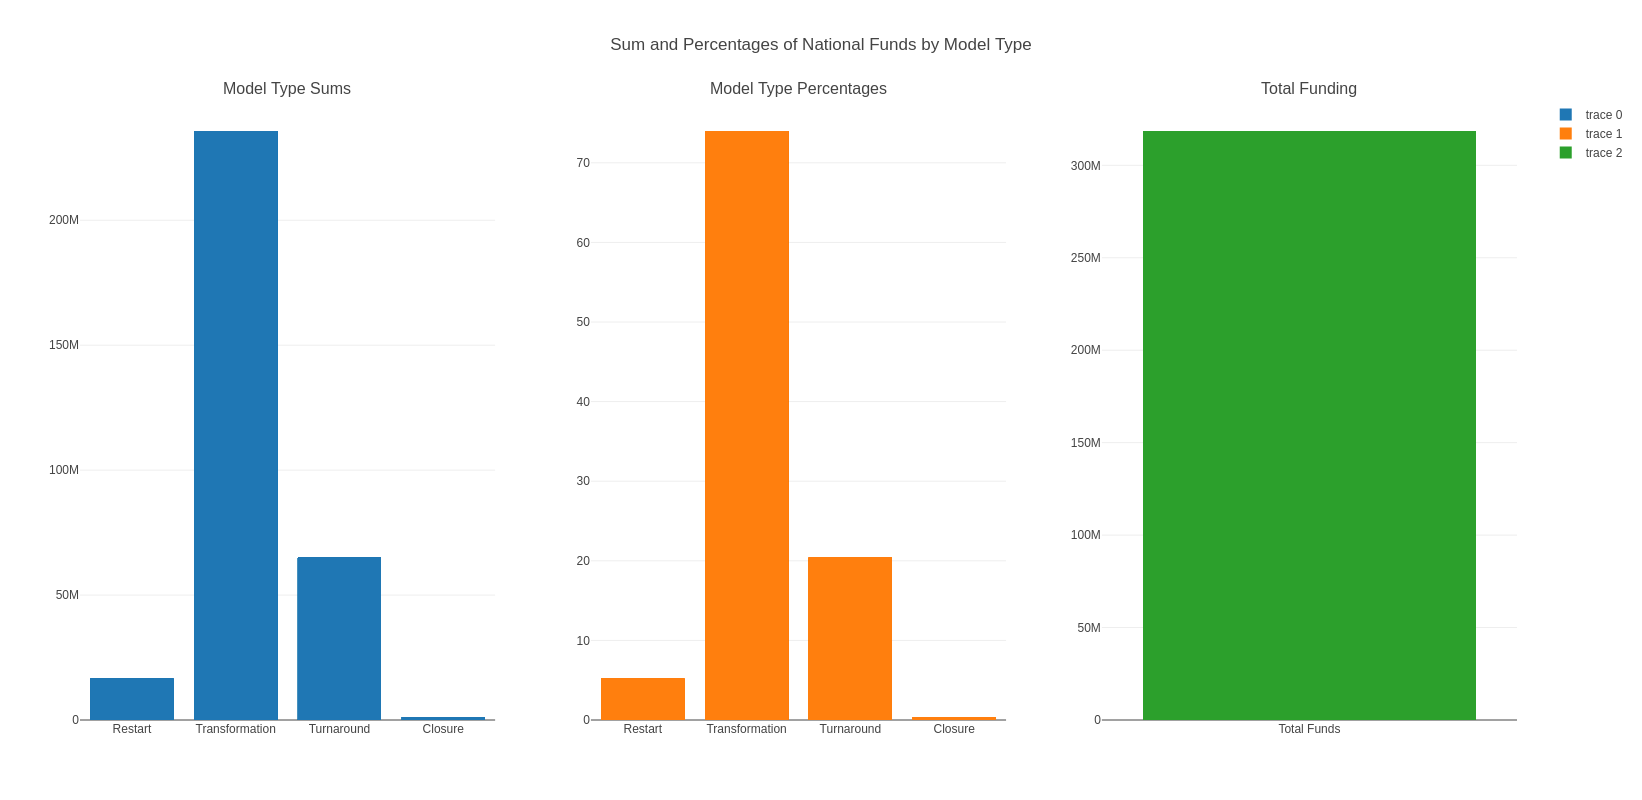

In [19]:
plotly.offline.iplot(fig1)

============================================================================================================

This graph provides three plots, two methods of viewing the amount of money as a portion of the total amount of funding; sum and percentage. The third is the total amount of funding. This helps illustrate the total amount of money, and displays how that money is divided into funding for different models of transformation. Interacting with the subplot on the right, we can see that the total amount of funding for this project is ~318 million. As we can see by looking and interacting with the two subplots on the left, The transformation takes up the largest portion of the total funds with ~ 235 million or ~ 74%. The closure model utilizes the least amount of funds with ~1.2 million and less than 1% of total funds. This graphical representation gives us a general idea as to what models most states chose and the amount of money dedicated to each. Might provide insight to those looking narrow down on model choices and cut funds. The closure model might be seen as unnecessary, since it absorbs very little funds. 

To answer the 3rd and 4th question, 'How much money is allocated to each state, and what are the prevailing model choices for each state?' I utilized the graph below:

### Plot 2:

============================================================================================================

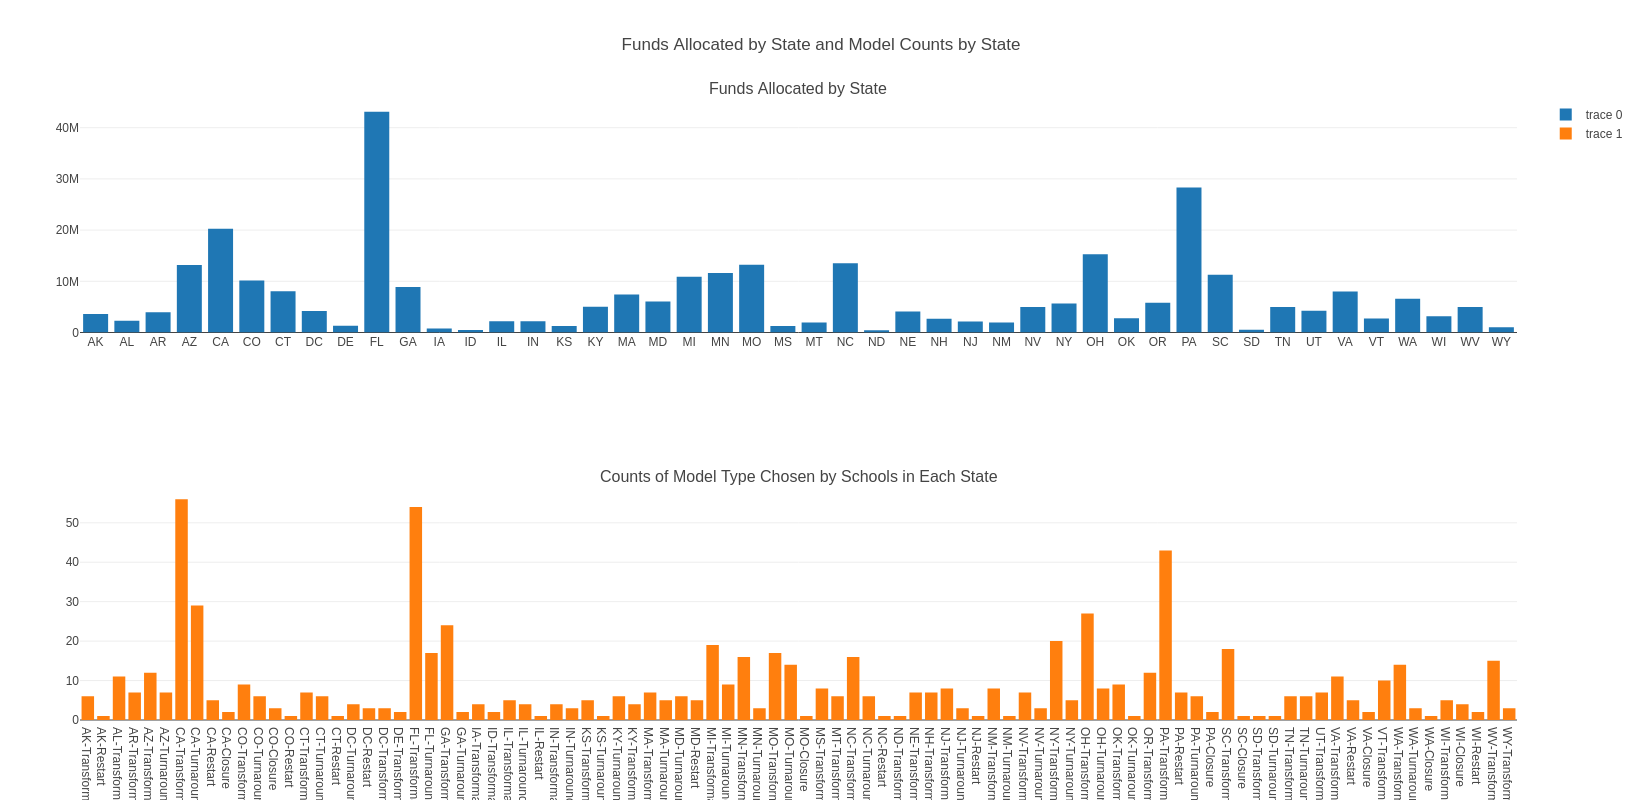

In [20]:
plotly.offline.iplot(fig2)

===========================================================================================================

This plot displays the total funds allocated to each state in the top subplot while also displaying the count of models chosen by each state in the bottom subplot. Each plot is interactive. The top plot contains one record for each state, while the bottom subplot holds multiple records corresponding by the types of models chosen by states. This plot helps highlight the states where most of the money was received, the bottom plot shows the most prevailing model choice by the schools. This bottom plots is also representative of the amount of schools receiving funding, 1 model count per school. This allows us to see which states recieve the most funding, what the prevailing model choice is per state. It seems that Transformation is most popular model. What is interesting to note is that California, Florida, and Pennsylvania are the three leading states that received the most funding. However when we look at the model count plot, we can see that california is the leading state that has the most schools receiving funding, surpassing even Florida. For certain model types, namely the Transformation model, California even surpasses Florida. Compare this to the Total funds allocated to each state. Florida receives nearly twice the amount of funding that California receives. Florida by far receives the most money overall. Furthermore, compare Pennsylvania with California, Pennsylvania has less schools than California yet it receives more money than California. This is indicative that Pennsylvania receives more money per school than California. 

To really get a look into where the differences lie, I used the plot below to answer the 5th question, "What is the total amount of funding that each state receives based upon model type?":


### Plot 3:

============================================================================================================

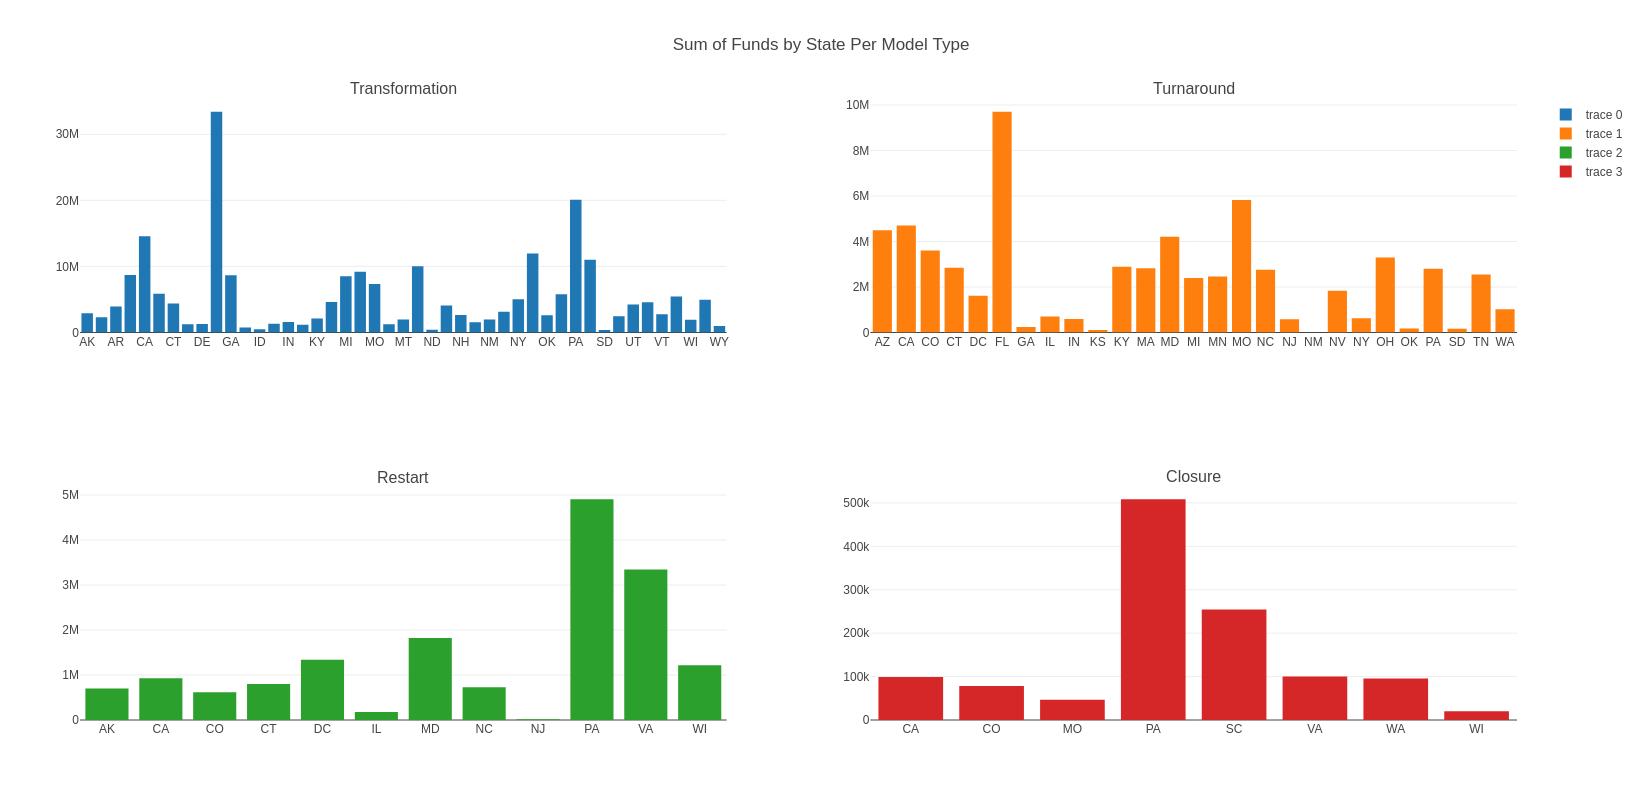

In [21]:
plotly.offline.iplot(fig3)


============================================================================================================

This model displays the total amount of funding that each state receives based upon the model type chosen. This can help give us insight on how much money is allocated to each model type within states. Each subplot is representative of the four model types. Each column represents the total money for each state.  When you look at the subplots, we can see that Florida receives the most money for the Transformation model and the Turnaround model. California, the second highest receipient of money, isn't as drastically pronounced in this plot. I believe this is due to California being represented across all four model types, while Florida is represented across two types. What is interesting to note in this graphic is that Pennsylvania is most pronounced is the two least likely model types. Pennsylvania receives more money per for Restart and Closure than any other State. Furthermore, Pennsylvania receives more money for restart than Turnaround. 

After this graphic, it might be interesting to look at the amount of money individual school districts receive in the states, to get an idea as indication of the problem districs. The below plot will help us get an idea of the dispersion of the problem districts, and is a place to start to identify surrounding factors that may be the cause of schools requesting school improvement grants.  

Which districts have the most amount of money pledged to them? Where are these districts located? Is there a cluster of school districts that receive high amount of funding?

### Plot 4:

============================================================================================================

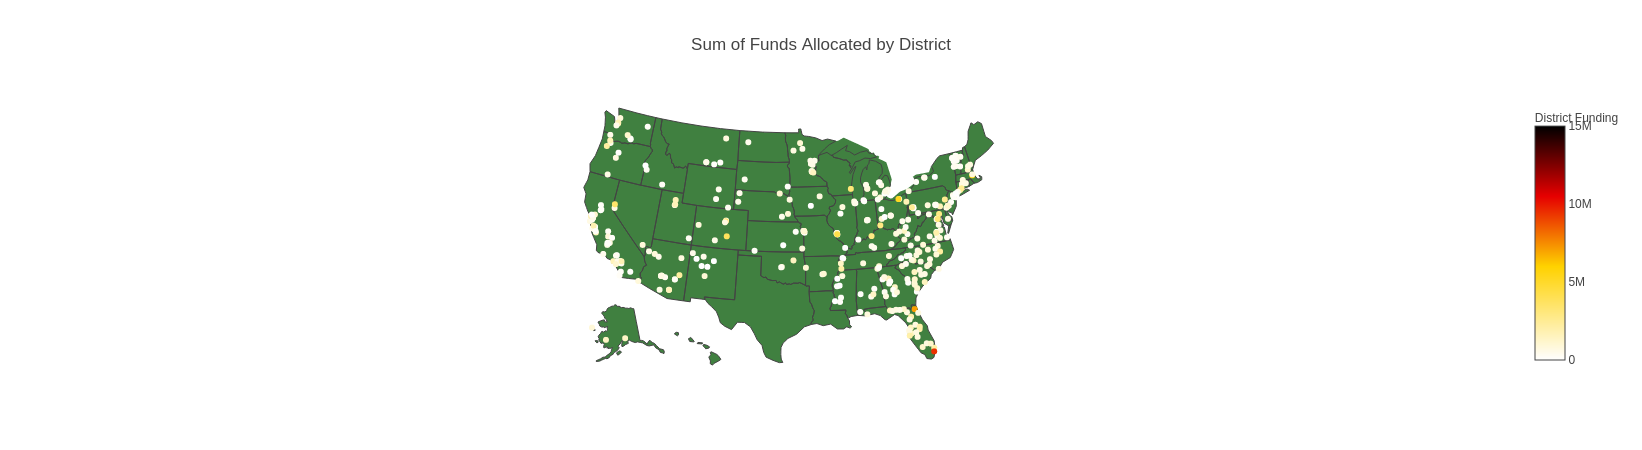

In [22]:
plotly.offline.iplot(Fig5)

============================================================================================================

The above interactive map plots school districts found within the state on the map with the total amount of funding that each district received. Rather than plotting individual schools, I decided to plot the districs to keep the map visually cleaner. Examining the map, we can see large clusters along the east coast. Most districts receive ~1 million dollars, there are a few districts across the map that receive from 5-15 million in grants. Examining Florida and California, we can see that most districts received <= 1 million, however there are large clusters of schools in central Florida and southern California. There is one district, Dade, in Florida that receives a large amount of funding that is worth looking into. That district has schools that collectively receive ~ 10 million in grant money. 

This map helps highlight districts that are outlier, and when combined with the table of information below, it can help us identify schools that are in a serious state of needing improvement. These schools are worth keeping a monitor on, especially if the receive large amounts of funding. Depending on the type of model chosen, if serious improvement is not achieved by the next round of funding, reassessment of method of improvement may be needed. 


### Table 1:

============================================================================================================

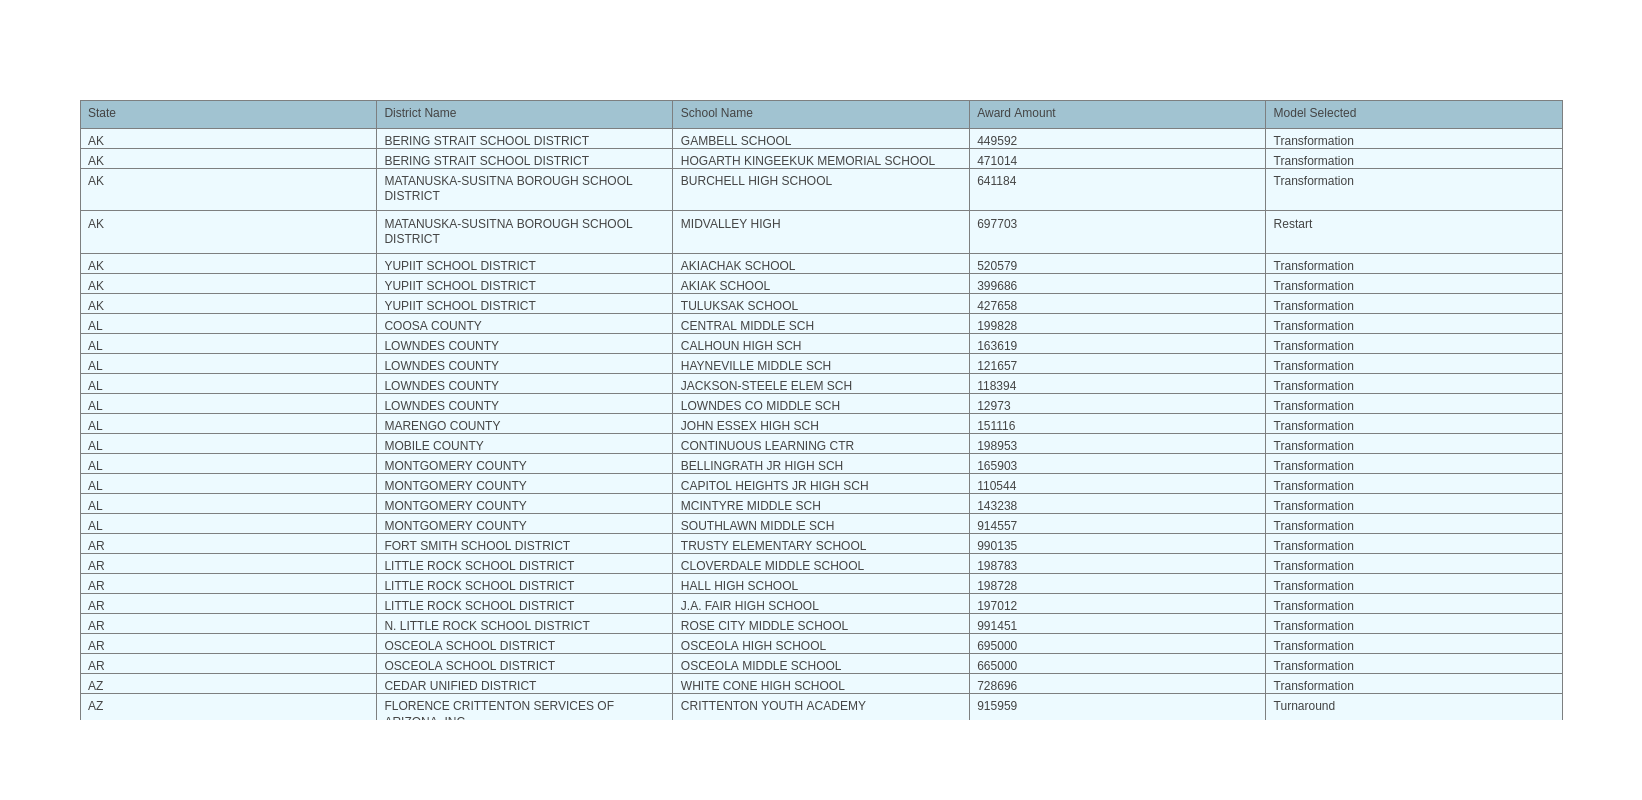

In [23]:
plotly.offline.iplot(fig7)

============================================================================================================

This table lists the state, district, school, award, and type of model selected. This table is sorted alphabetically by state and then county.Continuing on from the previous section, if we toggle down to the Florida and then Dade district, we can see that there are numerous schools within this district...19 schools. It is easy to see that how this district could accumulate ~10 million in grants. Some schools receive more than others, the most one school receives is 997,322 thousand. Nearly 1 million! Knowing from out previous graphics, Florida schools either choose Transformation or Turnaround transformations. This particular school receiving ~1 million within this district should be monitored appropriately. If significant improvement in academic goals are not realized after receipt of funds, a different method of approach may be necessary to achieve these goals. This is only more pressing since Transformation is the most popular model chosen across the states.

============================================================================================================

Rather than just one plot to describe the data, I believe a suite of plots in order from generalized to specific is more effective in answering questions. Splitting the data up and displaying the sum funds per model type, then sum funds by state, model type within state, district, then down to the specific school can help one realize just how effectively this grant money is being spent. It gives a sense as to which states posses the most schools in need of improvement, and helps administrators monitoring the program keep track of where funds are being allocated towards.